In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('fivethirtyeight')
import pickle 
import os 
import numpy as np
import cv2 
%matplotlib inline
print("yeeeees")

yeeeees


In [2]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
train = get_training_data('C:\\Users\\Lenovo\\Downloads\\archive (3)\\CNN Prediction\\train')
test = get_training_data('C:\\Users\\Lenovo\\Downloads\\archive (3)\\CNN Prediction\\test')
val = get_training_data('C:\\Users\\Lenovo\\Downloads\\archive (3)\\CNN Prediction\\val')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12972\1041612270.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [4]:
pnenumonia = 0 
normal = 0 

for i, j in train:
    if j == 0:
        pnenumonia+=1
    else:
        normal+=1
        
print('Pneumonia:', pnenumonia)
print('Normal:', normal)
print('Pneumonia - Normal:', pnenumonia-normal)

Pneumonia: 3875
Normal: 1341
Pneumonia - Normal: 2534


PNEUMONIA


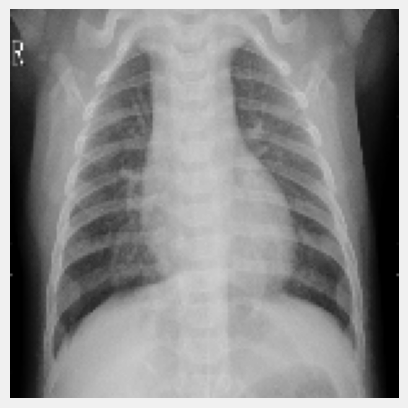

In [5]:
plt.imshow(train[1][0], cmap='gray')
plt.axis('off')
print(labels[train[1][1]])

In [6]:
X = []
y = []

for feature, label in train:
    X.append(feature)
    y.append(label)

for feature, label in test:
    X.append(feature)
    y.append(label)
    
for feature, label in val:
    X.append(feature)
    y.append(label)


# resize data for deep learning 
X = np.array(X).reshape(-1, img_size, img_size, 1)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=32)

In [7]:
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255

In [8]:
# good for balancing out disproportions in the dataset 
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=90, 
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=True)  

datagen.fit(X_train)

In [9]:
import numpy as np

# Check the shape and size of X_train before reshaping
print("X_train shape:", X_train.shape)
print("X_train size:", X_train.size)

# Ensure all images have the same dimensions
print("Image dimensions:", X_train[0].shape)
unique_dimensions = np.unique([img.shape for img in X_train])
if len(unique_dimensions) > 1:
    print("Images have inconsistent dimensions.")
    # Perform necessary preprocessing or resizing to ensure consistent dimensions

# Check the number of channels in the image data
num_channels = X_train[0].shape[-1]
print("Number of channels:", num_channels)
if num_channels != 3:
    print("Incorrect number of channels.")
    # Perform necessary conversion or preprocessing to ensure 3 channels (RGB)

import numpy as np
from skimage.color import gray2rgb

# Convert grayscale images to RGB format
X_train_rgb = np.array([gray2rgb(img) for img in X_train])

# Reshape X_train
X_train_reshaped = np.reshape(X_train_rgb, (X_train_rgb.shape[0], 150, 150, 3))

# Print the reshaped shape
print("Reshaped X_train shape:", X_train_reshaped.shape)

X_train shape: (3747, 150, 150, 1)
X_train size: 84307500
Image dimensions: (150, 150, 1)
Images have inconsistent dimensions.
Number of channels: 1
Incorrect number of channels.
Reshaped X_train shape: (3747, 150, 150, 3)


In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [13]:
# Reshape X_train to match the expected input shape of the model
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 150, 150, 1))
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
# Train the model
history = model.fit(X_train_reshaped, y_train,
                    steps_per_epoch=50,
                    epochs=25,
                    validation_data=(X_val, y_val),
                    validation_steps=50)

X_train shape: (3747, 150, 150, 1)
y_train shape: (3747,)
Epoch 1/25
50/50 [==============================] - 464s 9s/step - loss: 0.6131 - accuracy: 0.7232 - val_loss: 0.5329 - val_accuracy: 0.7407
Epoch 2/25
50/50 [==============================] - 352s 7s/step - loss: 0.4841 - accuracy: 0.7862 - val_loss: 0.3268 - val_accuracy: 0.8773
Epoch 3/25
50/50 [==============================] - 386s 8s/step - loss: 0.2904 - accuracy: 0.8842 - val_loss: 0.3101 - val_accuracy: 0.8762
Epoch 4/25
50/50 [==============================] - 368s 7s/step - loss: 0.2569 - accuracy: 0.8991 - val_loss: 0.2142 - val_accuracy: 0.9221
Epoch 5/25
50/50 [==============================] - 375s 7s/step - loss: 0.1942 - accuracy: 0.9237 - val_loss: 0.1612 - val_accuracy: 0.9434
Epoch 6/25
50/50 [==============================] - 389s 8s/step - loss: 0.1868 - accuracy: 0.9295 - val_loss: 0.2788 - val_accuracy: 0.8762
Epoch 7/25
50/50 [==============================] - 367s 7s/step - loss: 0.1644 - accuracy: 0.93

In [14]:
model.evaluate(X_test, y_test)

37/37 [==============================] - 21s 563ms/step - loss: 0.1250 - accuracy: 0.9650


[0.12500730156898499, 0.9650170803070068]

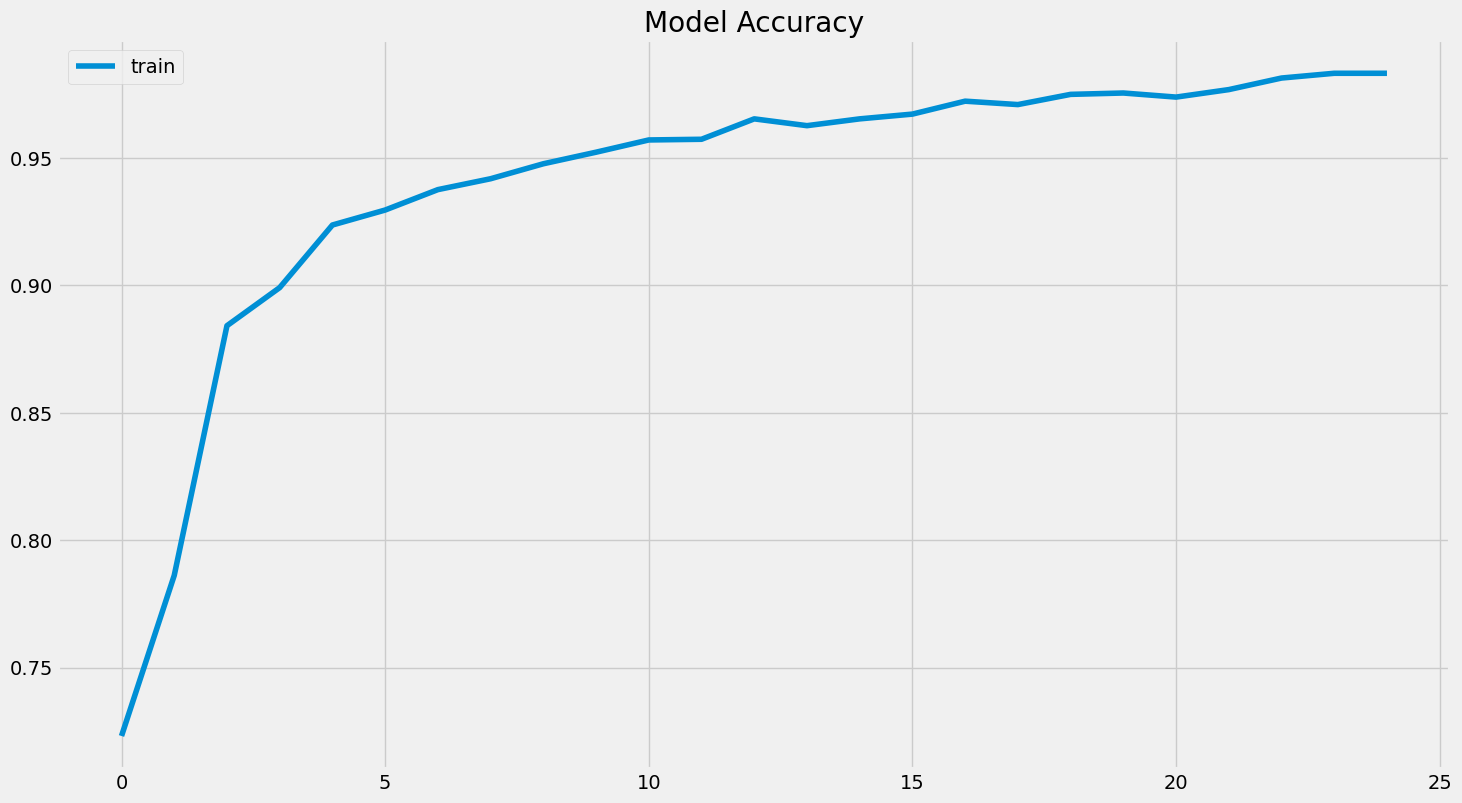

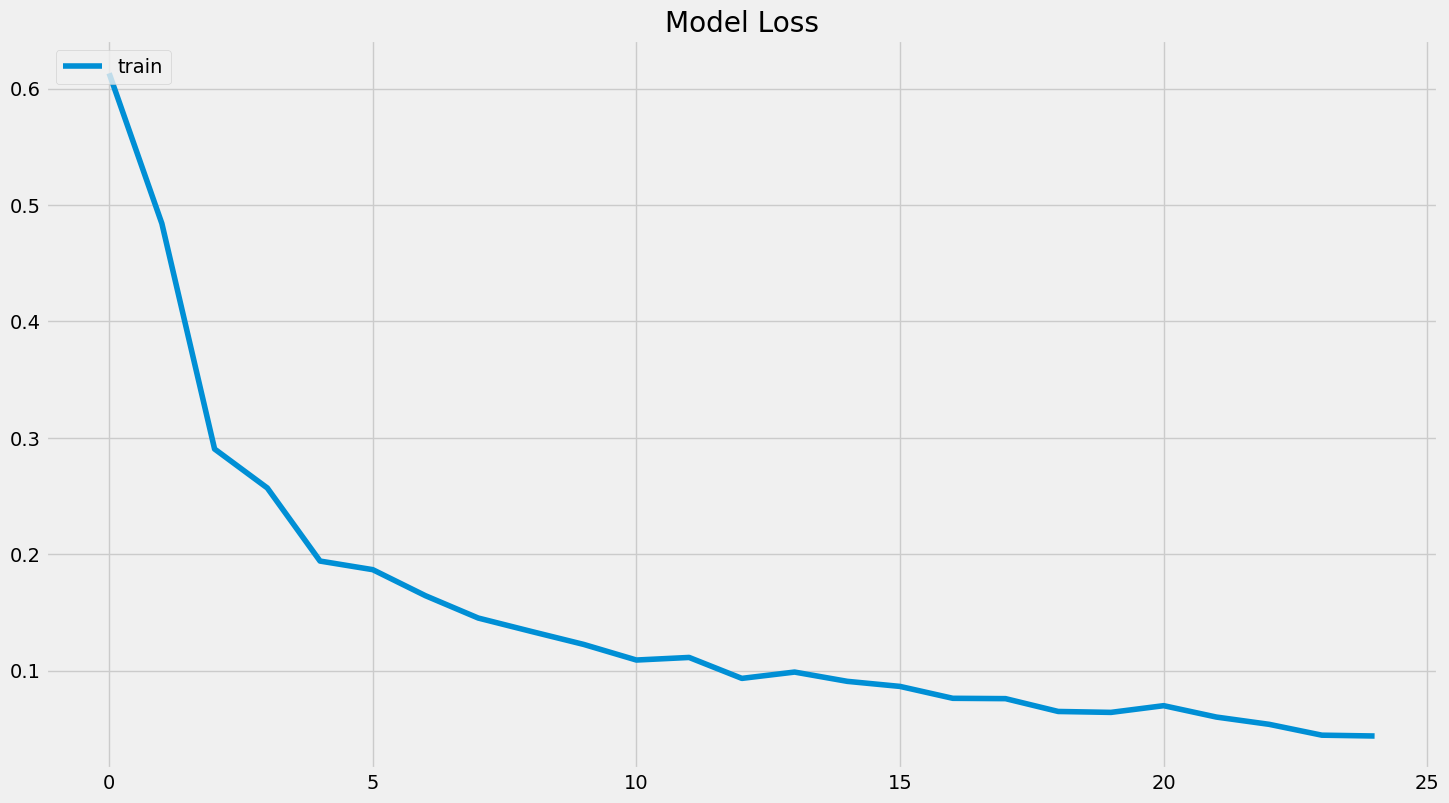

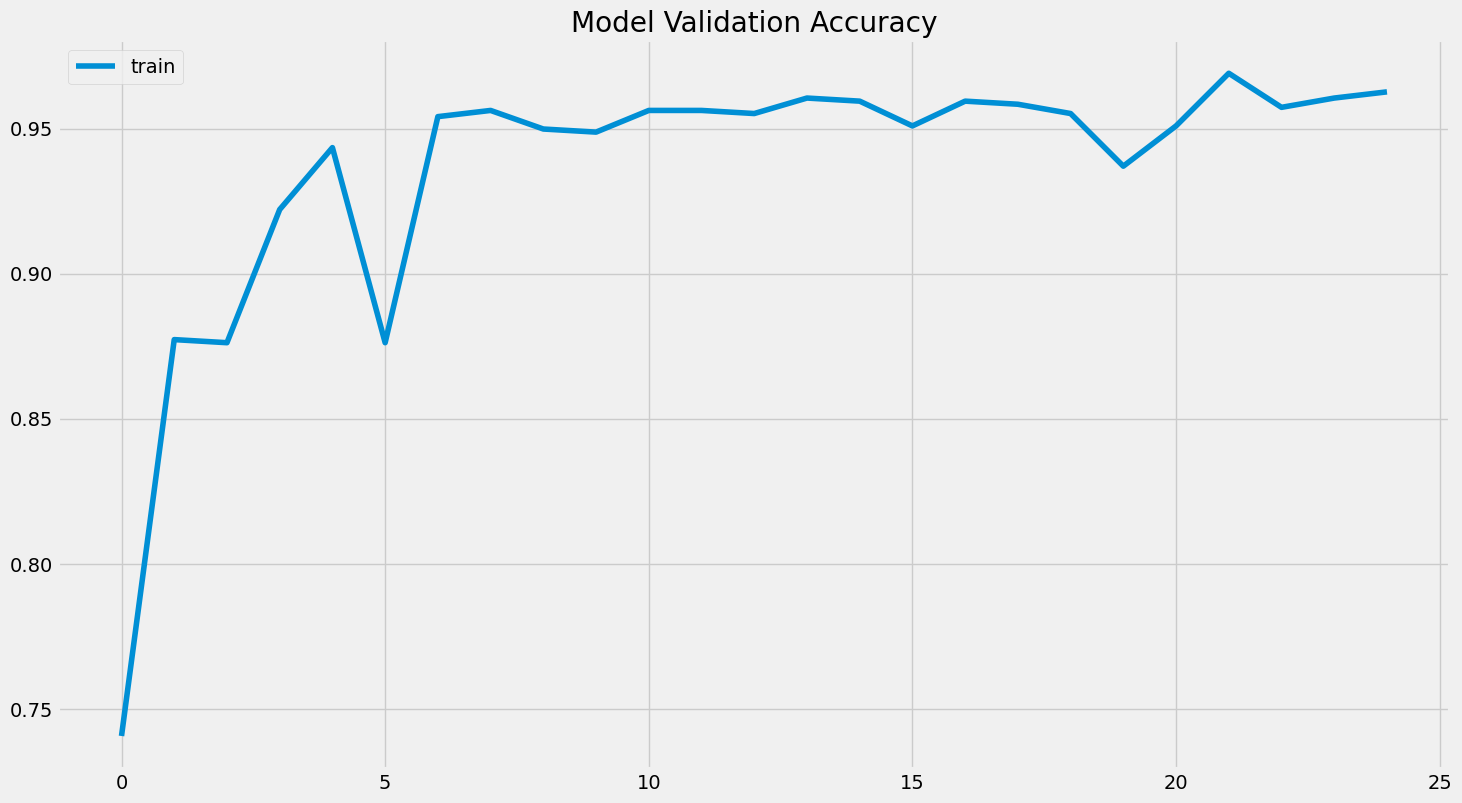

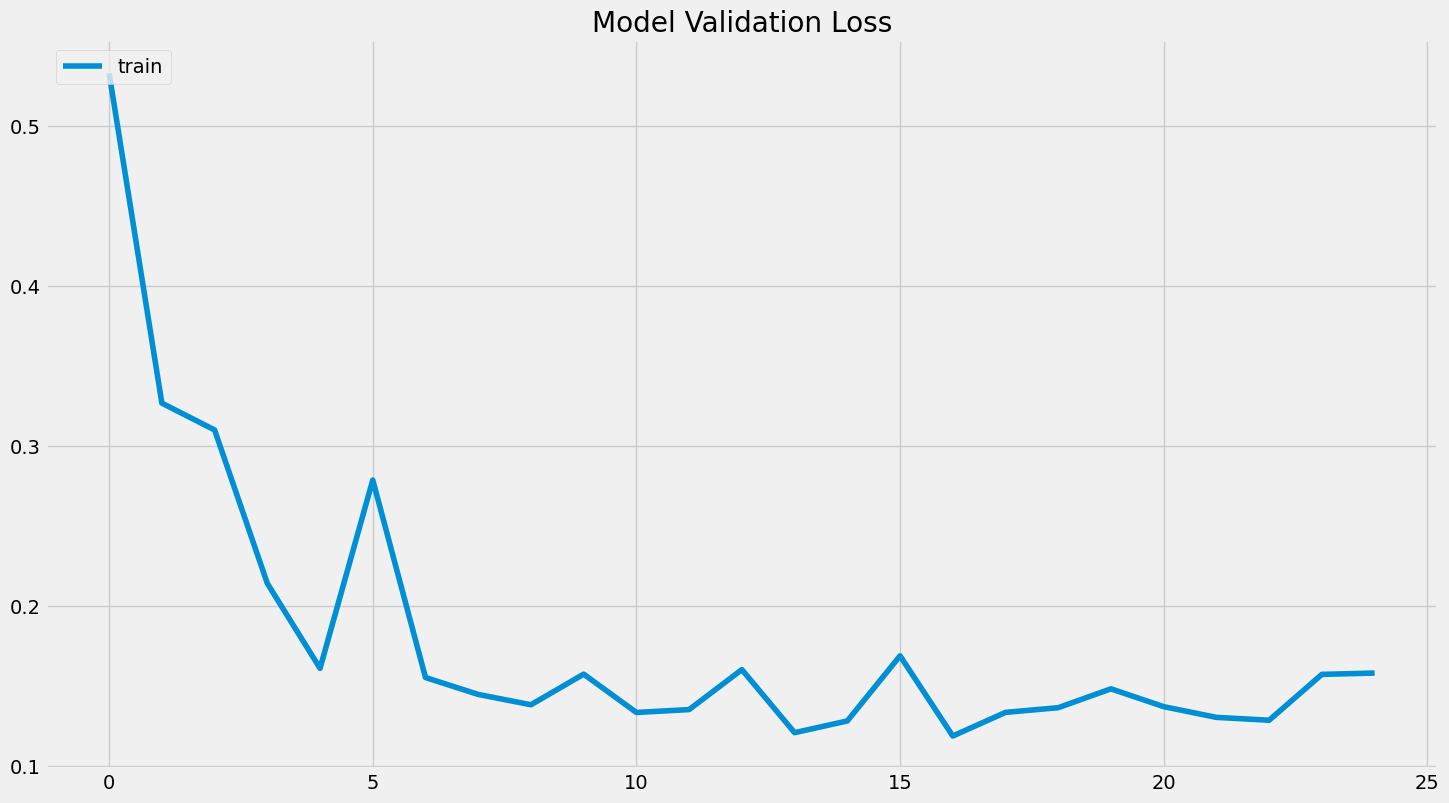

In [17]:
plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['accuracy'])
plt.title('Model Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['loss'])
plt.title('Model Loss')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['val_accuracy'])
plt.title('Model Validation Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['val_loss'])
plt.title('Model Validation Loss')
plt.legend(['train'], loc='upper left')
plt.show()

In [18]:
pred = model.predict(X_train)
precisions, recalls, thresholds = precision_recall_curve(y_train, pred)
fpr, tpr, thresholds2 = roc_curve(y_train, pred)

118/118 [==============================] - 115s 935ms/step


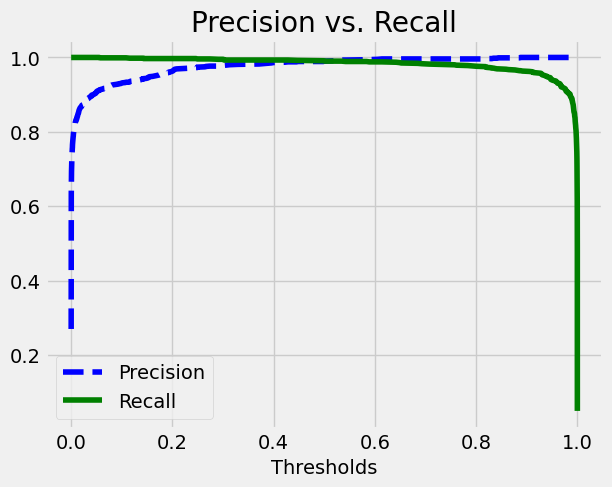

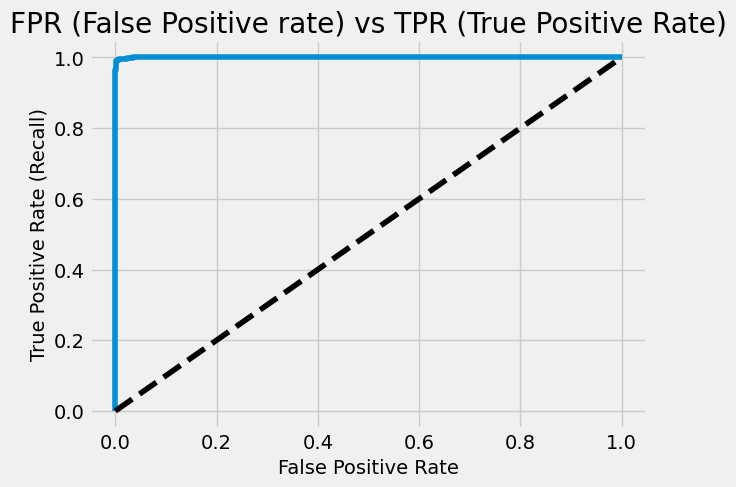

In [19]:
def plot_precision_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--')
    plt.plot(thresholds, recalls[:-1], 'g-')
    plt.title('Precision vs. Recall')
    plt.xlabel('Thresholds')
    plt.legend(['Precision', 'Recall'], loc='best')
    plt.show()

def plot_roc(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('FPR (False Positive rate) vs TPR (True Positive Rate)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.show()
    
plot_precision_recall(precisions, recalls, thresholds)
plot_roc(fpr, tpr)

In [20]:
predictions = model.predict(X_test)

37/37 [==============================] - 33s 886ms/step


In [21]:
binary_predictions = []
threshold = thresholds[np.argmax(precisions >= 0.80)]
for i in predictions:
    if i >= threshold:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

In [26]:
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))
from sklearn.metrics import f1_score
print('F1 on testing set:', f1_score(binary_predictions, y_test))

Accuracy on testing set: 0.9121160409556314
Precision on testing set: 0.9969604863221885
Recall on testing set: 0.7627906976744186
F1 on testing set: 0.8642951251646903


[Text(0, 0.5, 'PNEUMONIA'), Text(0, 1.5, 'NORMAL')]

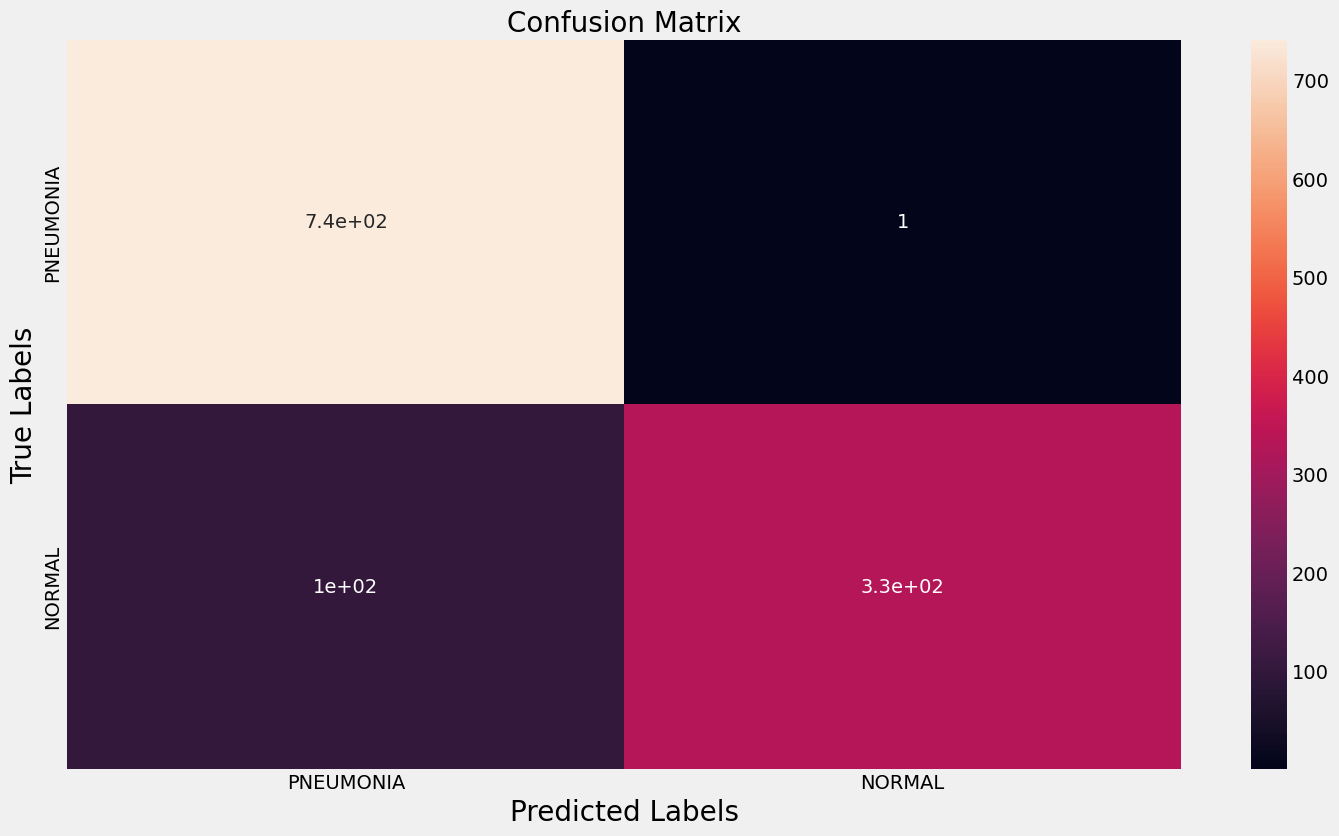

In [27]:
matrix = confusion_matrix(binary_predictions, y_test)
plt.figure(figsize=(16, 9))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

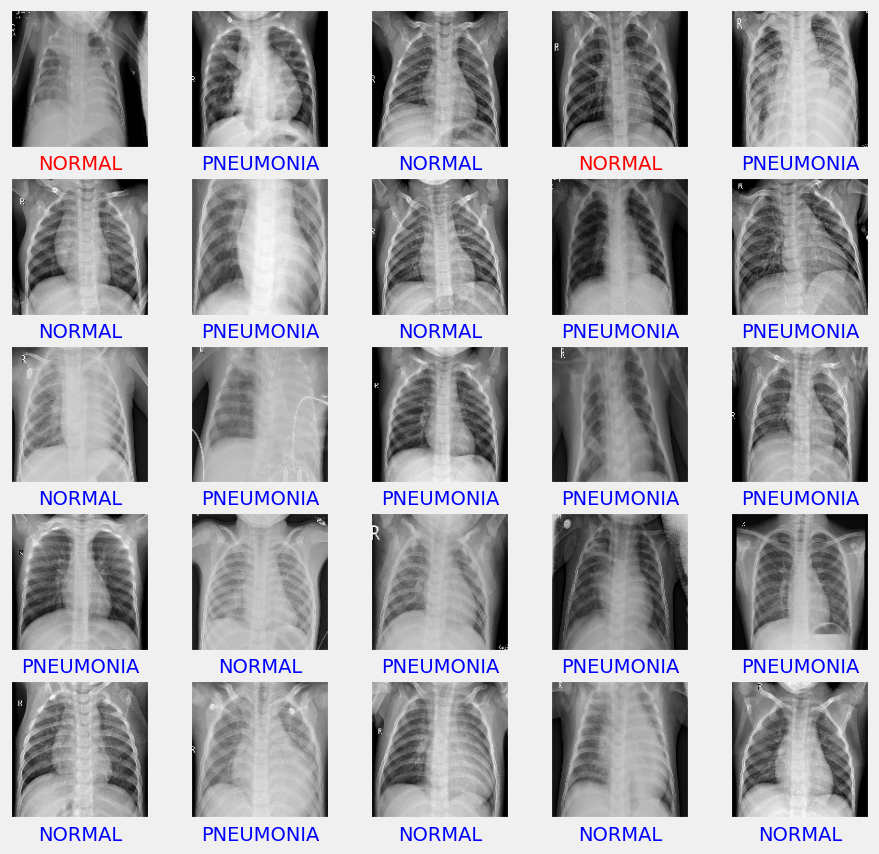

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train.reshape(-1, img_size, img_size)[i], cmap='gray')
    if(binary_predictions[i]==y_test[i]):
        plt.xlabel(labels[binary_predictions[i]], color='blue')
    else:
        plt.xlabel(labels[binary_predictions[i]], color='red')
plt.show()

In [29]:
model.save('pneumonia.h5')